In [620]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# 1) Create Signal

In [621]:
# [X] Try shift up and down of Sinus Signals
# [X] Try moving-average
# [X] Visualize Residuals (subtract trend and cosine)
# [] Try moving-average with parabula
# [] Build Preprocessing Pipeline

In [1112]:
dt = 1
t_origin = np.arange(0, 300, dt)
moving_avg = 0.05*t_origin + 10
signal_clear = 2*np.sin(2*np.pi*0.01*t_origin + 1) + np.sin(2*np.pi*0.1*t_origin) + 3*np.cos(2*np.pi*0.02*t_origin + 3)
signal_moving = signal_clear + moving_avg
noise = np.random.randn(len(t_origin))
signal_origin = 0.5*noise + signal_moving

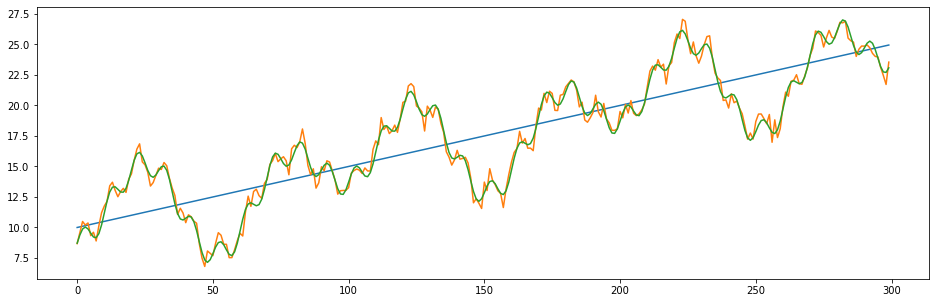

In [1113]:
plt.figure(figsize=(16, 5))
plt.plot(moving_avg)
plt.plot(signal_origin)
plt.plot(signal_moving)
plt.show()

# 2) Extract Trend

## 2.1) Linear Regression

In [1114]:
from sklearn.linear_model import LinearRegression

In [1115]:
model = LinearRegression()
model.fit(t_origin.reshape(-1, 1), signal_origin)
preds = model.predict(t_origin.reshape(-1, 1))

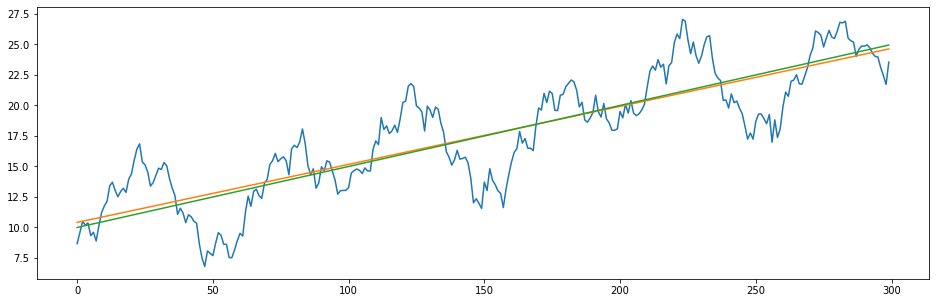

In [1116]:
plt.figure(figsize=(16, 5))
plt.plot(signal_origin)
plt.plot(preds)
plt.plot(moving_avg)
plt.show()

## 2.2) Convolve

In [1117]:
window = 100
kernel = np.ones(window) / window
conv = np.convolve(signal_origin, kernel, mode='same')

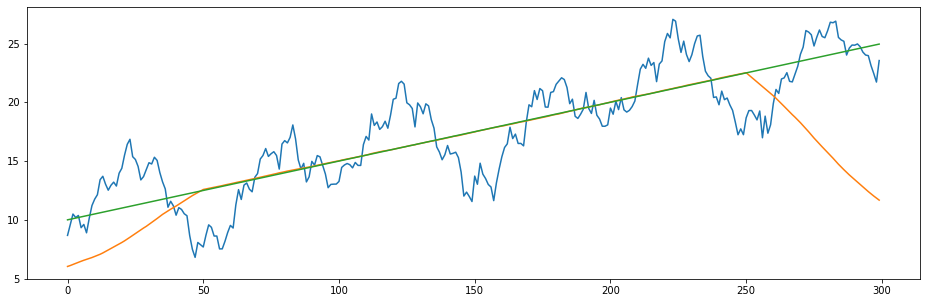

In [1118]:
plt.figure(figsize=(16, 5))
plt.plot(signal_origin)
plt.plot(conv)
plt.plot(moving_avg)
plt.show()

### 2.2.1) Cut out the first and last values

In [1119]:
convolve_cut = conv[50:-50]
t = t_origin[50:-50]
signal = signal_origin[50:-50]

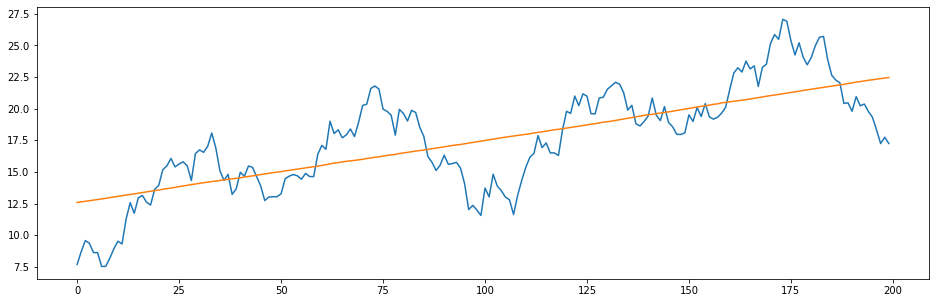

In [1120]:
plt.figure(figsize=(16, 5))
plt.plot(signal)
plt.plot(convolve_cut)
plt.show()

### 2.2.2) Subtract Trend from Signal

In [1121]:
signal = signal - convolve_cut

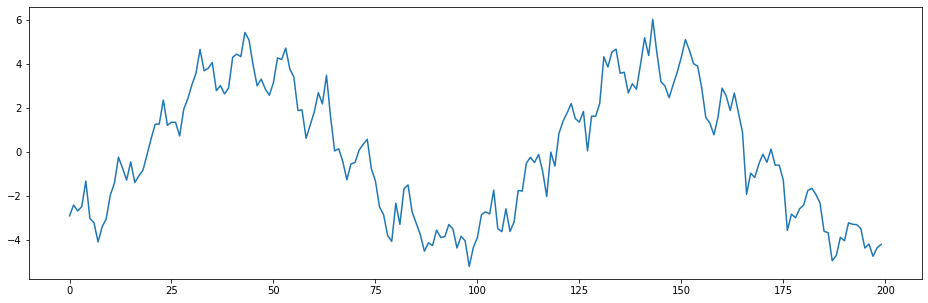

In [1122]:
plt.figure(figsize=(16, 5))
plt.plot(subtracted_signal)
plt.show()

# 3) Fast Fourier Transformation

In [1123]:
fhat = np.fft.fft(signal, len(signal))
fhat

array([ 4.83469666e+00+0.00000000e+00j,  2.54540099e+00-3.74130638e-01j,
       -1.67950269e+02+1.09531658e+02j,  1.22404204e+00+2.85930134e+00j,
       -2.97430757e+02+2.99146613e+01j, -5.35990724e+00+4.17093864e+00j,
        2.57083288e+00+1.67837691e+00j,  9.89310690e-02-2.43433854e+00j,
        4.75881189e+00-2.24181069e+00j,  3.10690946e+00+2.13724260e+00j,
       -2.09281493e+00+4.67226931e+00j,  1.17359310e+01-4.29265309e+00j,
        1.12900823e+00+8.01542748e+00j,  7.89679670e+00-5.28869261e-01j,
        1.41945310e+01-1.34293956e+01j,  2.32943636e-01-7.13508880e+00j,
       -1.19733937e+00+5.56023488e+00j, -4.77979783e+00+5.76069049e+00j,
       -7.58846139e+00-1.65901637e+00j, -1.26053842e+01+5.42719110e+00j,
       -5.60486614e-01-1.06278006e+02j, -8.94493063e+00+5.76025025e+00j,
       -8.99149656e-01-6.58916695e+00j,  3.65646219e+00+8.85729060e+00j,
        2.88868128e+00-5.78985928e-01j,  2.23943767e+00-3.16008579e+00j,
       -1.16474096e+00-3.65646609e+00j, -5.82530879

## 3.1) Amplitudes

### 3.1.1)  Absolute

In [1124]:
ABS = np.abs(fhat)
ABS

array([  4.83469666,   2.57274949, 200.51054065,   3.11028665,
       298.93133399,   6.7915635 ,   3.07020044,   2.43634798,
         5.26041878,   3.77103333,   5.11956784,  12.49635733,
         8.09454984,   7.91448677,  19.54055726,   7.13889032,
         5.6876914 ,   7.48545404,   7.76769474,  13.72407057,
       106.27948392,  10.63918545,   6.65023242,   9.58234379,
         2.94613378,   3.87314127,   3.83749473,   0.83276553,
         4.19347312,   2.61764218,   8.2723069 ,   4.26228691,
         6.59221457,   2.82983604,   3.14210841,   5.63786274,
         3.67973695,   4.0072061 ,   8.35006613,  12.06720222,
         4.33944705,   5.8436786 ,   2.35963119,   6.94655057,
         5.62616045,   8.06890524,   4.23886003,  12.88454777,
         8.71545205,   8.255064  ,   9.82961059,   1.14910319,
        10.86576559,   7.78840801,   1.5248578 ,   5.41219137,
        16.25658055,   9.42835974,   7.17886477,  10.89460351,
        10.95065844,  10.49595736,   7.08703888,   3.09

### 3.1.2) PDS (Power Spectral Density)

In [1125]:
PDS = fhat * np.conj(fhat)
PDS

array([2.33742917e+01+0.j, 6.61903996e+00+0.j, 4.02044769e+04+0.j,
       9.67388307e+00+0.j, 8.93599424e+04+0.j, 4.61253347e+01+0.j,
       9.42613074e+00+0.j, 5.93579146e+00+0.j, 2.76720058e+01+0.j,
       1.42206923e+01+0.j, 2.62099748e+01+0.j, 1.56158947e+02+0.j,
       6.55217372e+01+0.j, 6.26391008e+01+0.j, 3.81833378e+02+0.j,
       5.09637550e+01+0.j, 3.23498335e+01+0.j, 5.60320221e+01+0.j,
       6.03370816e+01+0.j, 1.88350113e+02+0.j, 1.12953287e+04+0.j,
       1.13192267e+02+0.j, 4.42255912e+01+0.j, 9.18213125e+01+0.j,
       8.67970427e+00+0.j, 1.50012233e+01+0.j, 1.47263658e+01+0.j,
       6.93498429e-01+0.j, 1.75852168e+01+0.j, 6.85205058e+00+0.j,
       6.84310615e+01+0.j, 1.81670897e+01+0.j, 4.34572929e+01+0.j,
       8.00797201e+00+0.j, 9.87284527e+00+0.j, 3.17854963e+01+0.j,
       1.35404640e+01+0.j, 1.60577007e+01+0.j, 6.97236044e+01+0.j,
       1.45617369e+02+0.j, 1.88308007e+01+0.j, 3.41485796e+01+0.j,
       5.56785937e+00+0.j, 4.82545648e+01+0.j, 3.16536814e+01+

## 3.2) Frequencies for x-Axis

In [1126]:
freq = np.fft.fftfreq(len(signal), dt)
freq

array([ 0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,
        0.04 ,  0.045,  0.05 ,  0.055,  0.06 ,  0.065,  0.07 ,  0.075,
        0.08 ,  0.085,  0.09 ,  0.095,  0.1  ,  0.105,  0.11 ,  0.115,
        0.12 ,  0.125,  0.13 ,  0.135,  0.14 ,  0.145,  0.15 ,  0.155,
        0.16 ,  0.165,  0.17 ,  0.175,  0.18 ,  0.185,  0.19 ,  0.195,
        0.2  ,  0.205,  0.21 ,  0.215,  0.22 ,  0.225,  0.23 ,  0.235,
        0.24 ,  0.245,  0.25 ,  0.255,  0.26 ,  0.265,  0.27 ,  0.275,
        0.28 ,  0.285,  0.29 ,  0.295,  0.3  ,  0.305,  0.31 ,  0.315,
        0.32 ,  0.325,  0.33 ,  0.335,  0.34 ,  0.345,  0.35 ,  0.355,
        0.36 ,  0.365,  0.37 ,  0.375,  0.38 ,  0.385,  0.39 ,  0.395,
        0.4  ,  0.405,  0.41 ,  0.415,  0.42 ,  0.425,  0.43 ,  0.435,
        0.44 ,  0.445,  0.45 ,  0.455,  0.46 ,  0.465,  0.47 ,  0.475,
        0.48 ,  0.485,  0.49 ,  0.495, -0.5  , -0.495, -0.49 , -0.485,
       -0.48 , -0.475, -0.47 , -0.465, -0.46 , -0.455, -0.45 , -0.445,
      

## 3.3) Plot Frequencies

In [1127]:
# Remove 0 to lessen offset effect on f=0
pos_indices = np.arange(1, len(signal) // 2)
pos_indices

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

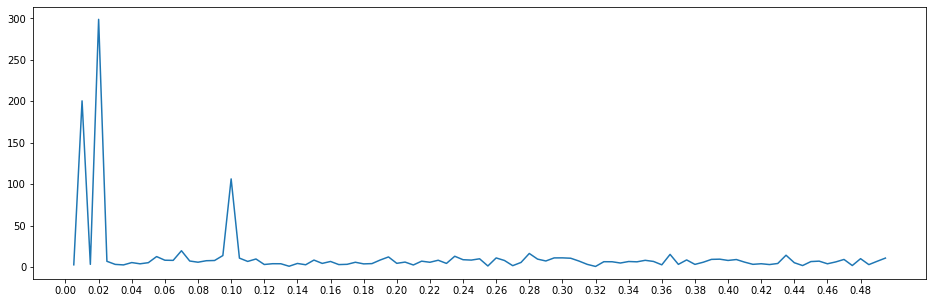

In [1128]:
plt.figure(figsize=(16, 5))
plt.xticks(np.arange(0, 0.5, 0.02))
plt.plot(freq[pos_indices], ABS[pos_indices])
plt.show()

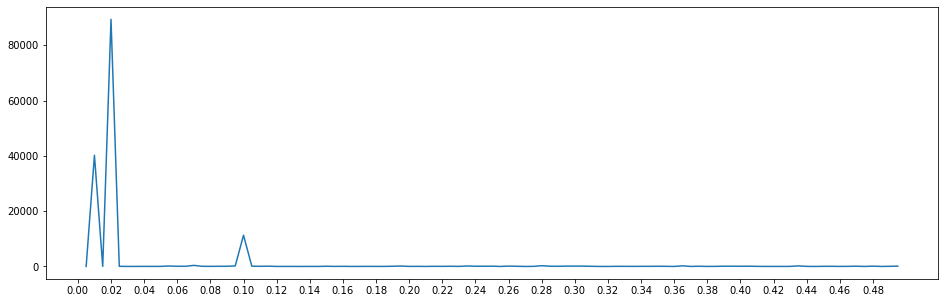

In [1129]:
plt.figure(figsize=(16, 5))
plt.xticks(np.arange(0, 0.5, 0.02))
plt.plot(np.abs(freq[pos_indices]), np.abs(PDS[pos_indices]))
plt.show()

## 3.4) Flter Data of important Frequencies

In [1130]:
thresholds = PDS[pos_indices] > 5000
thresholds

array([False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [1131]:
clean_indices = thresholds.nonzero()[0] + 1 # Add 1 to indices, because 0 gets leaved out
clean_indices

array([ 2,  4, 20])

### 3.4.1) Main Frequencies

In [1132]:
frequencies = freq[clean_indices]
frequencies

array([0.01, 0.02, 0.1 ])

### 3.4.2) Main PDS-Amplitudes

In [1133]:
pds_amplitudes = np.abs(PDS[clean_indices])
pds_amplitudes

array([40204.4769137 , 89359.94244189, 11295.32870302])

### 3.4.3) Main ABS-Amplitudes

In [1134]:
abs_amplitudes = ABS[clean_indices]
abs_amplitudes

array([200.51054065, 298.93133399, 106.27948392])

### 3.4.4) Main Shifts

In [1135]:
angles = np.angle(fhat[clean_indices])
angles

array([ 2.56369542,  3.04135285, -1.57607006])

# 4) Reconstruct Function

In [1136]:
loop_synthetic_abs_signal = np.zeros(len(signal))
for f, a, p in zip(frequencies, abs_amplitudes, angles):
    amplitude = a / (len(signal) / 2)
    phase = 2*np.pi*50*f + p # Shift 50 to the right and add additionaly shift of each separate sin-curve
    loop_synthetic_abs_signal += amplitude * np.cos(2*np.pi*f*t + phase)
    
loop_synthetic_abs_signal

array([-4.65941513e+00, -4.11315934e+00, -3.74976594e+00, -3.71806450e+00,
       -4.02043188e+00, -4.51226789e+00, -4.95788391e+00, -5.12144592e+00,
       -4.85821965e+00, -4.17124639e+00, -3.21177894e+00, -2.22328568e+00,
       -1.45038330e+00, -1.04745223e+00, -1.02180860e+00, -1.23310552e+00,
       -1.44915831e+00, -1.43683587e+00, -1.05326686e+00, -3.02489692e-01,
        6.64123697e-01,  1.60386210e+00,  2.27372700e+00,  2.52178821e+00,
        2.34397007e+00,  1.88459586e+00,  1.38049689e+00,  1.07004489e+00,
        1.10186047e+00,  1.47806984e+00,  2.05378138e+00,  2.59297545e+00,
        2.85944872e+00,  2.70806079e+00,  2.14141156e+00,  1.31027897e+00,
        4.57624928e-01, -1.72469988e-01, -4.26188928e-01, -2.96804639e-01,
        7.47241672e-02,  4.55580438e-01,  6.11982685e-01,  4.00393676e-01,
       -1.75826903e-01, -9.65996002e-01, -1.72809876e+00, -2.21983772e+00,
       -2.28998566e+00, -1.93516906e+00, -1.30040975e+00, -6.23231199e-01,
       -1.42688191e-01, -

# 5) Plot Result

[]

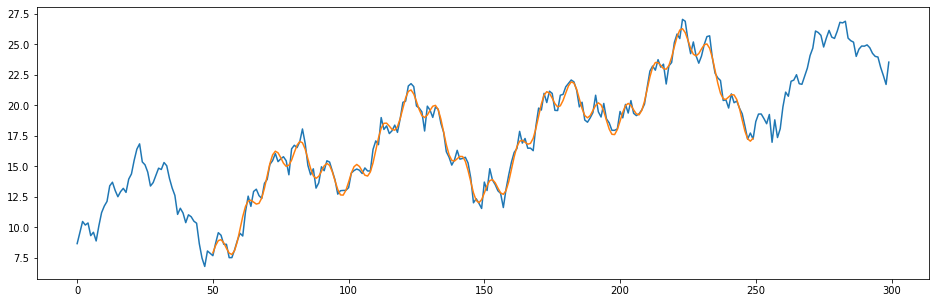

In [1137]:
plt.figure(figsize=(16, 5))
plt.plot(signal_origin)
plt.plot(t, loop_synthetic_abs_signal + convolve_cut)
plt.plot()

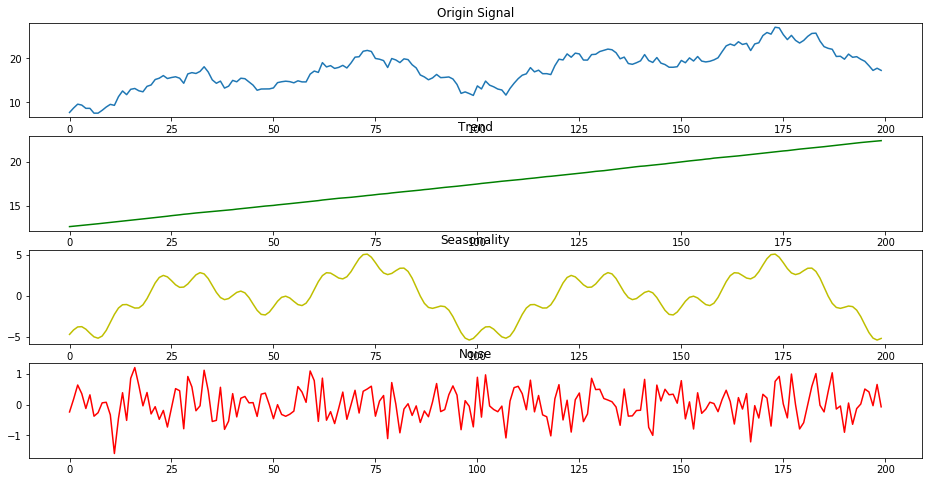

In [1138]:
plt.figure(figsize=(16, 8))

plt.subplot(4, 1, 1)
plt.title('Origin Signal')
plt.plot(signal_origin[50:-50])

plt.subplot(4, 1, 2)
plt.title('Trend')
plt.plot(convolve_cut, c='g')

plt.subplot(4, 1, 3)
plt.title('Seasonality')
plt.plot(loop_synthetic_abs_signal, c='y')

plt.subplot(4, 1, 4)
plt.title('Noise')
plt.plot(signal_origin[50:-50] - convolve_cut - loop_synthetic_abs_signal, c='r')

plt.show()